<a href="https://colab.research.google.com/github/lailatulbadriyah24/2141720036-PCVK-2023/blob/main/Week06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Folder dari Google Drive**

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Import Library**

In [52]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

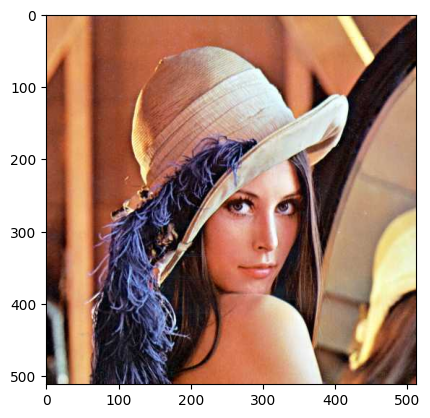

In [53]:
img = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

**3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart**

<BarContainer object of 256 artists>

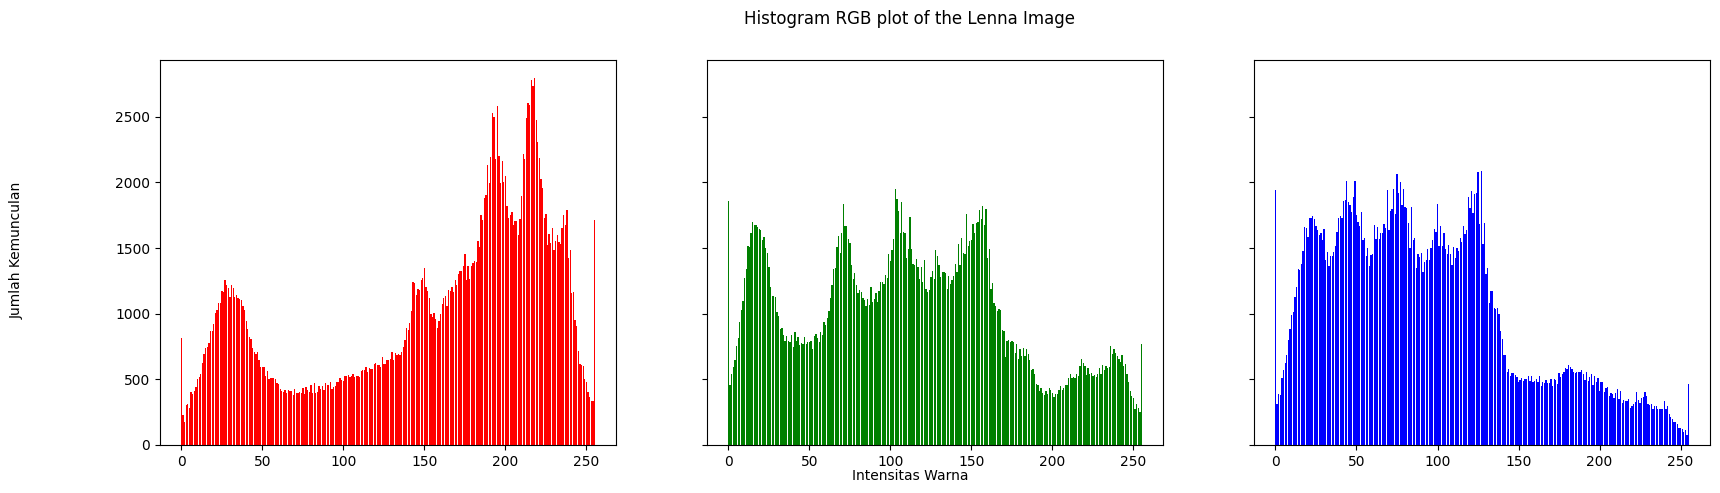

In [54]:
# Mendapatkan dimensi gambar (tinggi, lebar, kedalaman warna)
height, width, depth = np.shape(img)
# Membuat array dengan nama intensitas warna (0-255)
names = np.arange(256)

# Inisialisasi array yang akan digunakan untuk menghitung kemunculan intensitas warna
blue = [0]*256
green = [0]*256
red = [0]*256

# Loop melalui setiap piksel gambar
for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

# Membuat plot histogram RGB dalam tiga subplot
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot of the Lenna Image')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

**4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?**

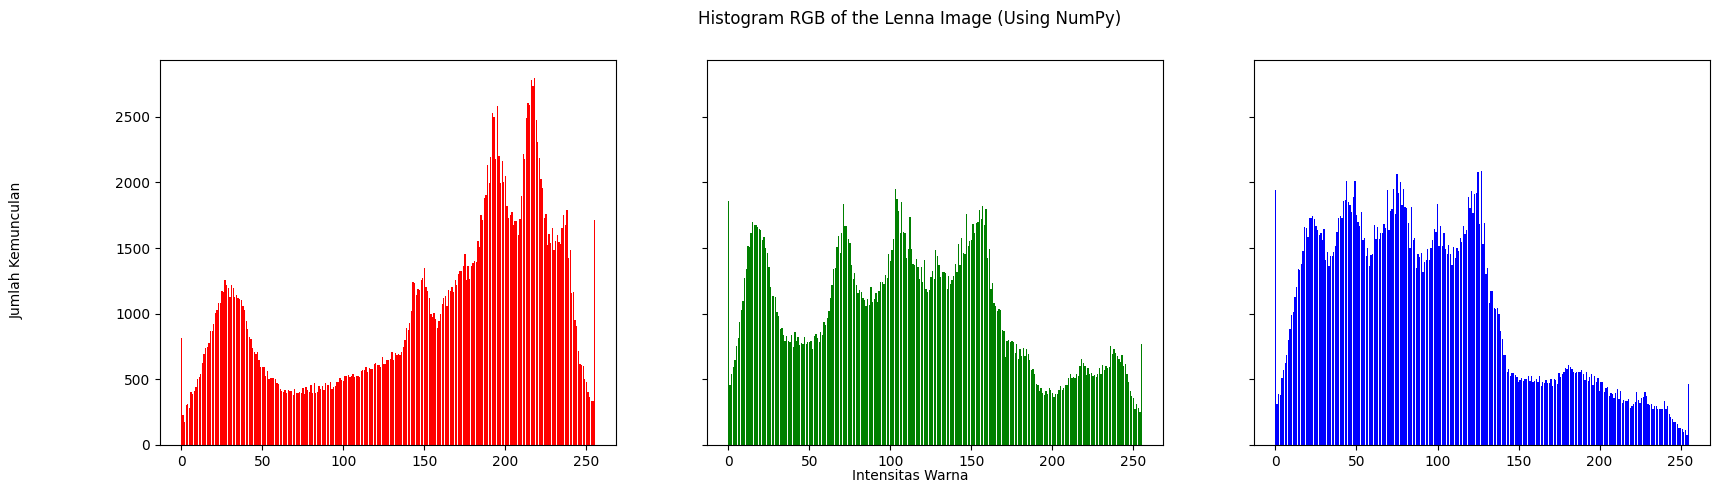

In [43]:
# Membuat histogram dengan NumPy
hist_red, bins_red = np.histogram(img[:, :, 2], bins=256, range=(0, 256))
hist_green, bins_green = np.histogram(img[:, :, 1], bins=256, range=(0, 256))
hist_blue, bins_blue = np.histogram(img[:, :, 0], bins=256, range=(0, 256))

# Membuat tiga histogram terpisah untuk masing-masing saluran warna
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB of the Lenna Image (Using NumPy)')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), hist_red, color='red')
axs[1].bar(range(256), hist_green, color='green')
axs[2].bar(range(256), hist_blue, color='blue')

# Tampilkan histogram
plt.show()

**5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart**

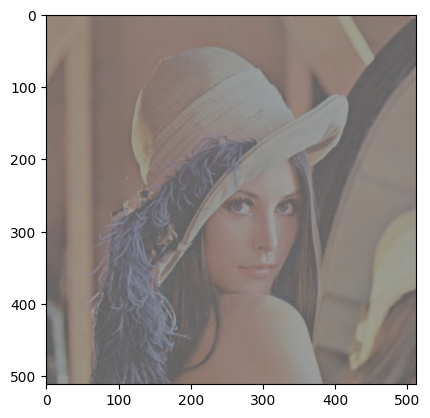

In [55]:
img = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

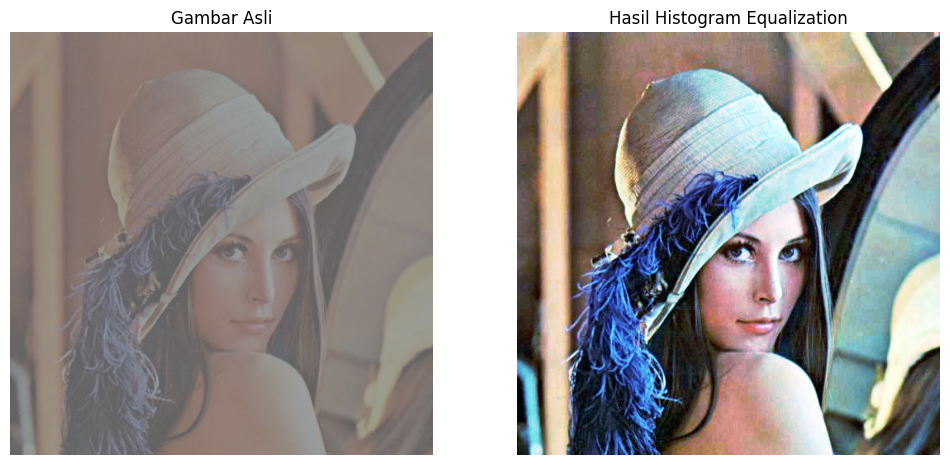

In [59]:
# Pisahkan saluran warna (BGR)
blc, glc, rlc = cv.split(img)

# Equalization pada setiap saluran warna
equalized_blc = cv.equalizeHist(blc)
equalized_glc = cv.equalizeHist(glc)
equalized_rlc = cv.equalizeHist(rlc)

# Gabungkan kembali saluran warna yang sudah diequalisasi
equalized_imglc = cv.merge((equalized_blc, equalized_glc, equalized_rlc))

# Display images side by side using matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Image after histogram equalization
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_imglc, cv2.COLOR_BGR2RGB))
plt.title('Hasil Histogram Equalization')
plt.axis('off')

plt.show()

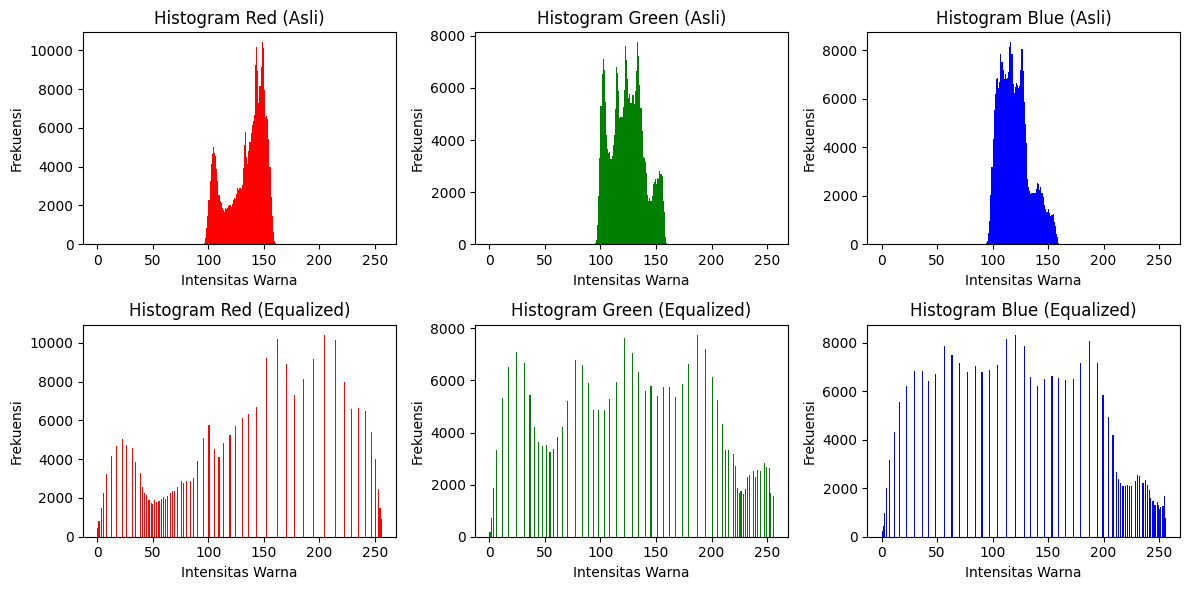

In [63]:
# Pisahkan saluran warna (BGR)
blc, glc, rlc = cv2.split(img)

# Equalization pada setiap saluran warna
equalized_blc = cv2.equalizeHist(blc)
equalized_glc = cv2.equalizeHist(glc)
equalized_rlc = cv2.equalizeHist(rlc)

# Gabungkan kembali saluran warna yang sudah diequalisasi
equalized_imglc = cv2.merge((equalized_blc, equalized_glc, equalized_rlc))

# Menampilkan histogram plot dari gambar asli dan gambar hasilnya
plt.figure(figsize=(12, 6))

# Tampilkan histogram gambar asli untuk masing-masing saluran warna
plt.subplot(2, 3, 1)
plt.hist(rlc.ravel(), bins=256, range=(0, 256), color='r')
plt.title('Histogram Red (Asli)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Frekuensi')

plt.subplot(2, 3, 2)
plt.hist(glc.ravel(), bins=256, range=(0, 256), color='g')
plt.title('Histogram Green (Asli)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Frekuensi')

plt.subplot(2, 3, 3)
plt.hist(blc.ravel(), bins=256, range=(0, 256), color='b')
plt.title('Histogram Blue (Asli)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Frekuensi')

# Tampilkan histogram gambar hasil histogram equalization untuk masing-masing saluran warna
plt.subplot(2, 3, 4)
plt.hist(equalized_rlc.ravel(), bins=256, range=(0, 256), color='r')
plt.title('Histogram Red (Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Frekuensi')

plt.subplot(2, 3, 5)
plt.hist(equalized_glc.ravel(), bins=256, range=(0, 256), color='g')
plt.title('Histogram Green (Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Frekuensi')

plt.subplot(2, 3, 6)
plt.hist(equalized_blc.ravel(), bins=256, range=(0, 256), color='b')
plt.title('Histogram Blue (Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Frekuensi')

plt.tight_layout()  # Mengatur jarak antar subplot agar lebih luas
plt.show()

**6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?**

**7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)**